# Tạo bài toán, nhìn chung là ổn

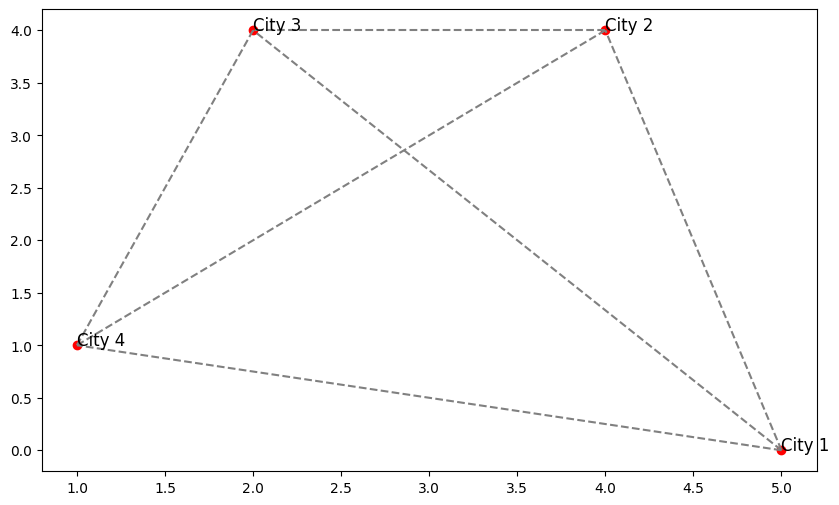

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

class TravellingSalesmanProblem:
    def __init__(self, num_cities, max_coordinate):
        self.num_cities = num_cities
        self.max_coordinate = max_coordinate
        self.cities = self._generate_cities()
        self.dist_matrix = self._calculate_distance_matrix()

    def _generate_cities(self):
        return np.random.randint(0, self.max_coordinate, size=(self.num_cities, 2))

    def _calculate_distance_matrix(self):
        num_cities = self.cities.shape[0]
        dist_matrix = np.zeros((num_cities, num_cities))
        for i in range(num_cities):
            for j in range(num_cities):
                dist_matrix[i, j] = np.linalg.norm(self.cities[i, :2] - self.cities[j, :2])
        return dist_matrix

    def total_distance(self, path):
        return sum(self.dist_matrix[path[i], path[i + 1]] for i in range(len(path) - 1))

    def visualize_cities(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.cities[:, 0], self.cities[:, 1], c='red')

        for i in range(self.num_cities):
            plt.text(self.cities[i, 0], self.cities[i, 1], f'City {i+1}', fontsize=12)

        # Nối các thành phố với nhau bằng các đường thẳng
        for i in range(self.num_cities):
            for j in range(i + 1, self.num_cities):
                plt.plot([self.cities[i, 0], self.cities[j, 0]], 
                        [self.cities[i, 1], self.cities[j, 1]], 'gray', linestyle='--')
num_cities = 4
max_coordinate = 6
tsp = TravellingSalesmanProblem(num_cities, max_coordinate)
tsp.visualize_cities()

# Cái này xem tham khảo chứ chưa dùng được

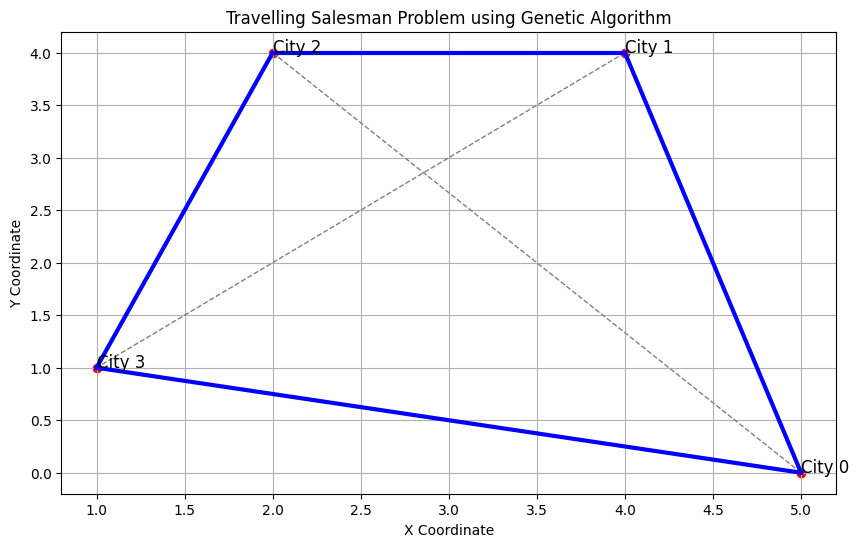

In [11]:
class GeneticAlgorithm:
    def __init__(self, tsp, pop_size=100, num_generations=500, mutation_rate=0.1):
        self.tsp = tsp
        self.pop_size = pop_size
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate

    def create_initial_population(self):
        population = []
        for _ in range(self.pop_size):
            individual = list(np.random.permutation(self.tsp.num_cities))
            individual.append(individual[0])  # Quay lại thành phố đầu tiên
            population.append(individual)
        return population

    def evaluate_population(self, population):
        fitness_scores = []
        for individual in population:
            fitness_scores.append(self.tsp.total_distance(individual))
        return fitness_scores

    def select_parents(self, population, fitness_scores, num_parents):
        parents = np.array(population)[np.argsort(fitness_scores)[:num_parents]]
        return parents.tolist()

    def crossover(self, parent1, parent2):
        size = len(parent1)
        if size < 2:
            raise ValueError("Size of parent must be at least 2 for crossover.")
        start, end = sorted(random.sample(range(1, size - 1), 2))
        child = [None] * size
        child[start:end] = parent1[start:end]
        pointer = 0
        for gene in parent2:
            if gene not in child:
                while child[pointer] is not None:
                    pointer += 1
                child[pointer] = gene
        child[-1] = child[0]
        return child

    def mutate(self, individual):
        for i in range(1, len(individual) - 1):
            if random.random() < self.mutation_rate:
                j = random.randint(1, len(individual) - 2)
                individual[i], individual[j] = individual[j], individual[i]

    def run(self):
        population = self.create_initial_population()
        best_fitness = float('inf')
        best_individual = None

        for generation in range(self.num_generations):
            fitness_scores = self.evaluate_population(population)
            parents = self.select_parents(population, fitness_scores, self.pop_size // 2)

            if len(parents) % 2 != 0:
                parents = parents[:-1]

            next_population = []
            for i in range(0, len(parents), 2):
                parent1, parent2 = parents[i], parents[i + 1]
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                self.mutate(child1)
                self.mutate(child2)
                next_population.extend([child1, child2])

            population = next_population

            # Đánh giá lại fitness của quần thể mới
            fitness_scores = self.evaluate_population(population)
            best_gen_fitness = min(fitness_scores)
            best_gen_individual = population[np.argmin(fitness_scores)]

            # Cập nhật cá thể tốt nhất nếu cần
            if best_gen_fitness < best_fitness:
                best_fitness = best_gen_fitness
                best_individual = best_gen_individual

            # # Hiển thị lộ trình và tổng khoảng cách tốt nhất của thế hệ hiện tại
            # print(f"Generation {generation + 1}: Best path {best_gen_individual}, Total distance: {best_gen_fitness:.2f}")

        return best_individual


ga = GeneticAlgorithm(tsp)
best_path = ga.run()

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))

# Vẽ các thành phố
plt.scatter(tsp.cities[:, 0], tsp.cities[:, 1], c='red')

# Vẽ các cạnh nối tất cả các thành phố với màu xám và nét đứt
for i in range(num_cities):
    for j in range(i + 1, num_cities):
        plt.plot([tsp.cities[i, 0], tsp.cities[j, 0]], 
                 [tsp.cities[i, 1], tsp.cities[j, 1]], 'gray', linestyle='--',linewidth=1)

# Vẽ lộ trình tốt nhất tìm được với màu xanh và nét đậm
for i in range(len(best_path) - 1):
    plt.plot([tsp.cities[best_path[i], 0], tsp.cities[best_path[i+1], 0]], 
             [tsp.cities[best_path[i], 1], tsp.cities[best_path[i+1], 1]], 'b-', linewidth=3)  # Tăng độ dày

# Hiển thị tên thành phố
for i in range(num_cities):
    plt.text(tsp.cities[i, 0], tsp.cities[i, 1], f'City {i}', fontsize=12)

plt.title('Travelling Salesman Problem using Genetic Algorithm')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


# Thử từng tham số

## thí nghiệm
